# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
# %config InlineBackend.figure_format="retina"  # only for retina display

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = 1e4  # use this
N = int(N)
theta = 1
sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
sample

array([0.37454012, 0.95071431, 0.73199394, ..., 0.94670792, 0.39748799,
       0.2171404 ])

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
samples_len = np.arange(1, N + 1)
sample_mean = np.cumsum(sample) / samples_len
sample_max = np.maximum.accumulate(sample)
sample_min = np.minimum.accumulate(sample)
estimators1 = 2 * sample_mean
estimators2 = sample_mean + (sample_max / 2)
estimators3 = sample_min * (samples_len + 1)
estimators4 = sample_max + sample_min
estimators5 = (sample_max * (samples_len + 1)) / samples_len

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

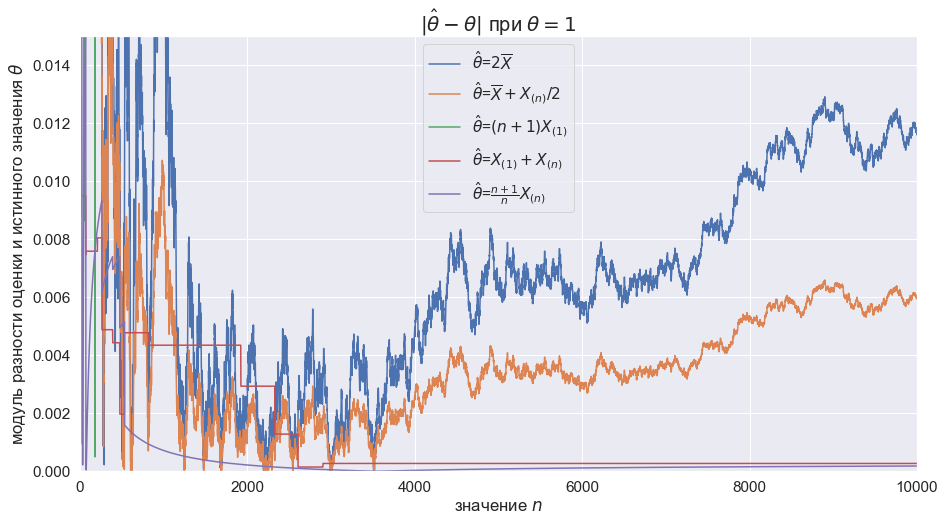

In [5]:
estimators_list = [estimators1, estimators2, estimators3, estimators4, estimators5]
estimator_tex = ["$2\\overline{X}$", "$\\overline{X} + X_{(n)}/2$", 
                 "$(n+1)X_{(1)}$","$X_{(1)}+X_{(n)}$", "$\\frac{n+1}{n}X_{(n)}$"]
plt.figure(figsize=(15, 8))
for estimator, label in zip(estimators_list, estimator_tex):
    sns.lineplot(x=samples_len, y=np.abs(estimator - theta), label=f"$\\hat\\theta$={label}")
plt.ylim(0, 0.015)
plt.xlim(0, N)
plt.title(f"$|\\hat\\theta -\\theta|$ при $\\theta=1$", fontsize=20)
plt.ylabel("модуль разности оценки и истинного значения $\\theta$")
plt.xlabel("значение $n$")
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ $\frac{n+1}{n} X_{(n)}$



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

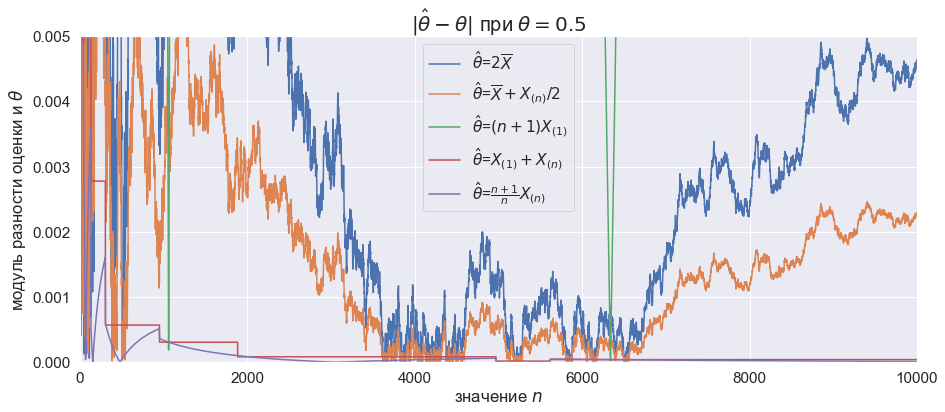

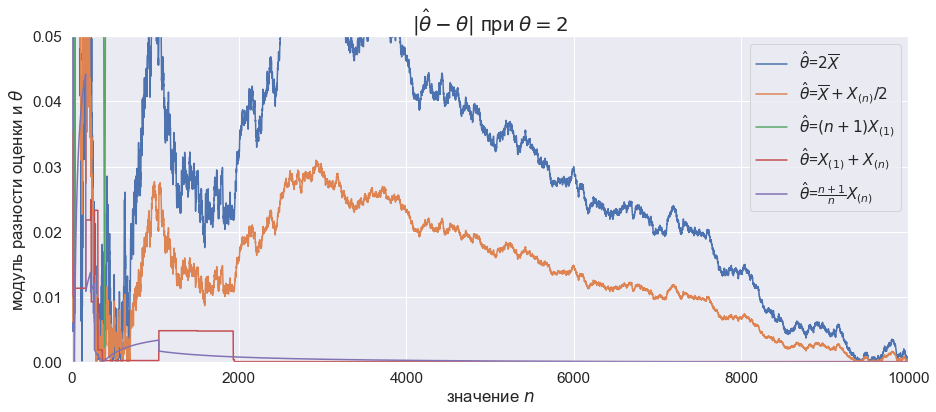

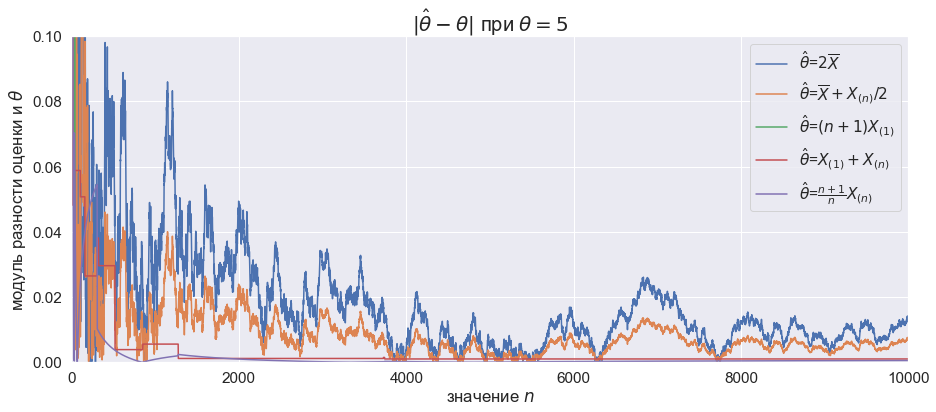

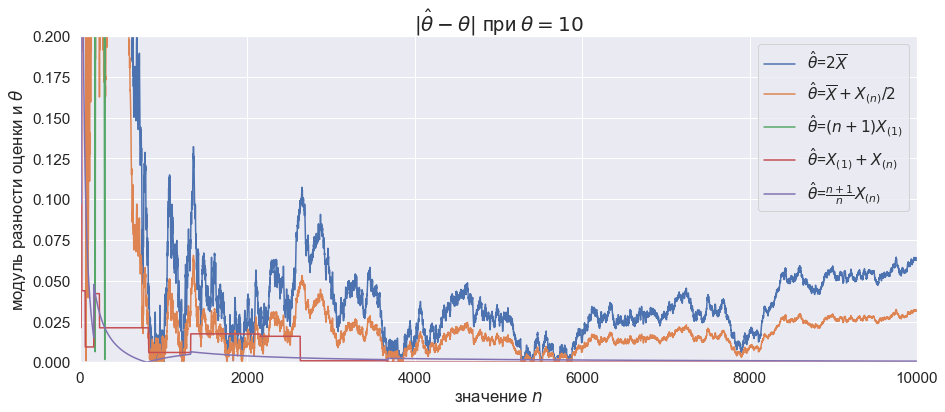

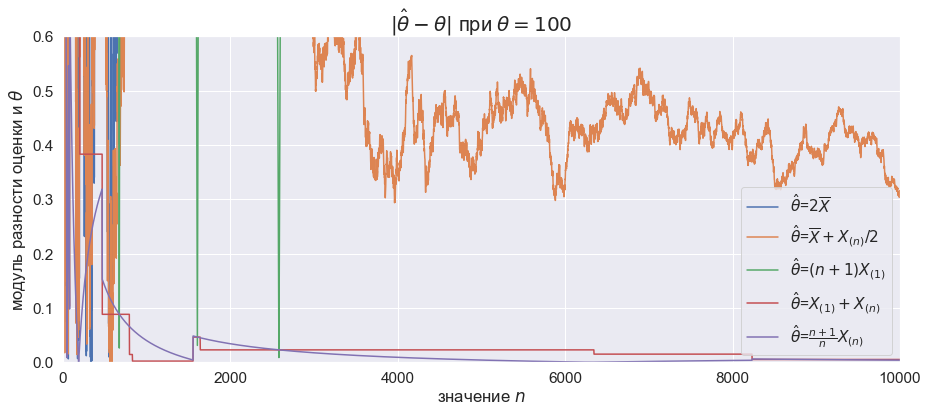

In [6]:
thetas = [0.5, 2, 5, 10, 100]
ylims = [0.005, 0.05, 0.1, 0.2, 0.6]
for param, ylim_upper in zip(thetas, ylims):
    temp_sample = sps.uniform(loc=0, scale=param).rvs(size=N)
    temp_sample_mean = np.cumsum(temp_sample) / samples_len
    temp_sample_max = np.maximum.accumulate(temp_sample)
    temp_sample_min = np.minimum.accumulate(temp_sample)
    temp_estimators = np.zeros([5, N])
    temp_estimators[0] = 2 * temp_sample_mean
    temp_estimators[1] = temp_sample_mean + (temp_sample_max / 2)
    temp_estimators[2] = temp_sample_min * (samples_len + 1)
    temp_estimators[3] = temp_sample_max + temp_sample_min
    temp_estimators[4] = (temp_sample_max * (samples_len + 1)) / samples_len
    
    plt.figure(figsize=(15, 6))
    for estimator, label in zip(temp_estimators, estimator_tex):
        sns.lineplot(x=samples_len, y=np.abs(estimator - param), label=f"$\\hat\\theta$={label}")
    plt.ylim(0, ylim_upper)
    plt.xlim(0, N)
    plt.title(f"$|\\hat\\theta -\\theta|$ при $\\theta={param}$", fontsize=20)
    plt.ylabel("модуль разности оценки и $\\theta$")
    plt.xlabel("значение $n$")
    plt.show()

Сделайте вывод.


__Вывод:__ как можно увидеть из графиков, лучше всех оценивают параметр оценки $\frac{n-1}{n}X_{(n)}$ и $X_{(1)}+X_{(n)}$, т.к. они являются, и состоятельными, и сильно-состоятельными, и асимптотически-нормальными оценками. $2\overline{X}$ так же обладает этими свойствами, но как видим у этой оценки часто возникают скачки, что естественно, т.к. это по сути это удвоенное среднее арифметическое выборки и знаем, что это не "честное" среднее, т.к. при появлении выборосов в выборке оно либо может сильно расти либо сильно снизиться. Оценка $\overline{X}+X_{(n)}/2$ ведет себя почти как $2\overline{X}$, и ее скачки и упадки объясняются так же как и у $2\overline{X}$. Можно так же заметить, что с ростом параметра, модуль разности в начале становится больше.

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

__Решение:__ пусть $f(x) \geq 0$ - плотность распределения нашего распределения. Имеем:
$$ \begin{array}{l}
\int _{-\infty }^{\infty } f( x) dx=1\\
\int _{-\infty }^{\infty } xf( x) dx< \infty \\
\int _{-\infty }^{\infty } x^{2} f( x) dx< \infty \\
\int _{-\infty }^{\infty } x^{3} f( x) dx=\infty \Longrightarrow f( x) =\begin{cases}
\frac{c}{x^{4}} & x\geqslant 1\\
0 & x< 1
\end{cases}
\end{array}$$
И раз $\int _{-\infty }^{\infty } f( x) dx=\int _{1}^{\infty }\frac{c}{x^{4}} dx=1$ получаем, $c=3$.
Итак, искомое распределение имеет плотность: $$f( x) =\begin{cases}
\frac{3}{x^{4}} & x\geqslant 1\\
0 & x< 1
\end{cases},$$
и функцию распределния:
$$F( x) =\begin{cases}
1 - \frac{1}{x^{3}} & x\geqslant 1\\
0 & x< 1
\end{cases}$$

Чтобы сгененрировать эти случайные величины, воспользуемся преобразованием случайных величин из курса теории веротяностей, а точнее, если $\xi$ и $\eta=\phi(\xi)$ случайные величины, причем $\xi$ принимает значения в области $(a,b) -\infty \geq a \ge b \geq +\infty$, и $\phi(x)$ строго возрастающая и дифференцируема в области $(a,b)$, то 
$$\rho_{\eta}(x)=\frac{\rho_{\xi}(\phi^{-1}(x))}{\phi'(\phi^{-1}(x))}I(a, b).$$
Пусть $\xi \in Exp(\lambda)$ и $\phi(x)=e^x$, тогда $\rho_{e^\xi}(x) =\begin{cases}
\frac{\lambda}{x^{\lambda+1}} & x\geqslant 1\\
0 & x< 1
\end{cases}$

In [7]:
custom_sample = sps.expon(scale=1/3).rvs(size=N)
custom_sample = np.exp(custom_sample)
custom_sample

array([1.56991957, 2.03364432, 1.23043045, ..., 2.32974489, 1.07742585,
       1.03543195])

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

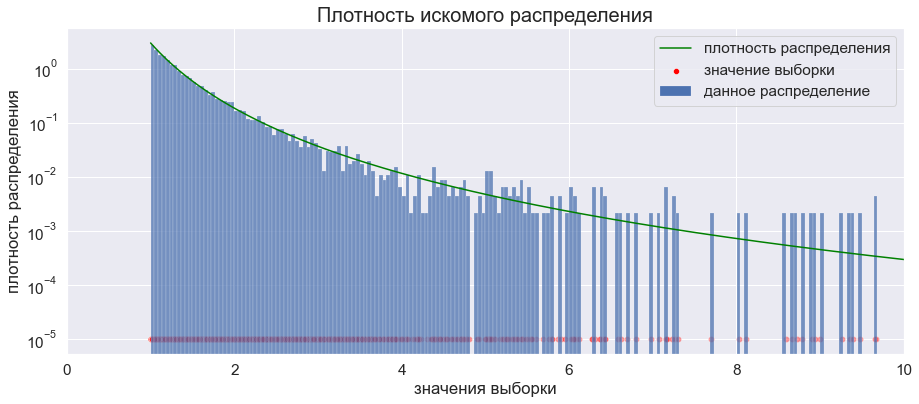

In [8]:
plt.figure(figsize=(15, 6))
grid = np.linspace(1, 20, 1000)
sns.lineplot(x=grid, y=(3 / np.power(grid, 4)), color='green', label='плотность распределения')
sns.histplot(x=custom_sample, stat='density', label='данное распределение')
sns.scatterplot(x=custom_sample, y=([1e-5] * N), alpha=0.4, color='red', label='значение выборки')

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.yscale('log')
plt.xlim(0, 10)
plt.title("Плотность искомого распределения", fontsize=20)
plt.xlabel("значения выборки")
plt.ylabel("плотность распределения")
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_n)$ для дисперсии.

In [9]:
custom_sample_mean = np.cumsum(custom_sample) / samples_len
sample_second_moment = np.cumsum(np.power(custom_sample, 2)) / samples_len
sample_variance = sample_second_moment - np.power(custom_sample_mean, 2)
sample_variance

array([0.        , 0.05376016, 0.10838289, ..., 0.55121722, 0.55117918,
       0.55114479])

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

Вычислим истинное значение дисперсии $DX_1$:
$$\begin{array}{l}
EX_{1} =\int _{1}^{\infty } xf( x) dx=\int _{1}^{\infty }\frac{3}{x^{3}} dx=-\frac{3}{2x^{2}}\Bigl|_{1}^{\infty } =\frac{3}{2}\\
EX_{1}^{2} =\int _{1}^{\infty } x^{2} f( x) dx=\int _{1}^{\infty }\frac{3}{x^{2}} dx=-\frac{3}{x}\Bigl|_{1}^{\infty } =3\\
DX_{1} =EX_{1}^{2} -( EX_{1})^{2} =3-\frac{9}{4} =\frac{3}{4}
\end{array}$$

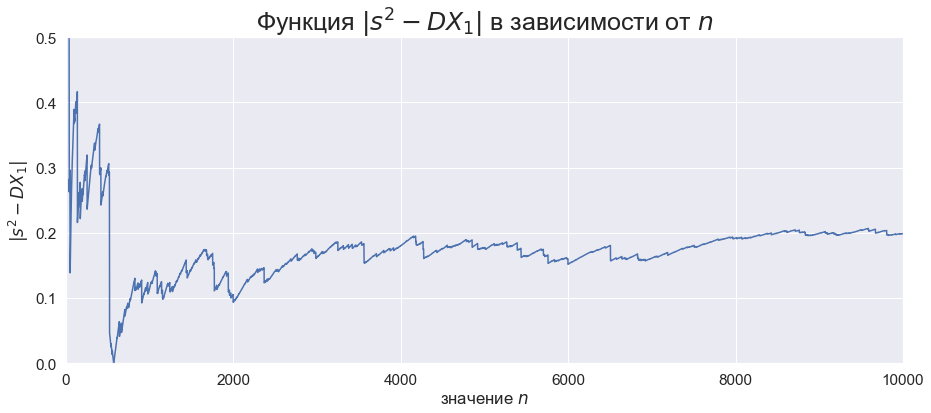

In [10]:
variance = 0.75
plt.figure(figsize=(15, 6))
sns.lineplot(x=samples_len, y=np.abs(sample_variance - variance))
plt.ylim(0, 0.5)
plt.xlim(0, N)
plt.title("Функция $|s^2-DX_1|$ в зависимости от $n$", fontsize=25)
plt.ylabel("$|s^2-DX_1|$")
plt.xlabel("значение $n$")
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


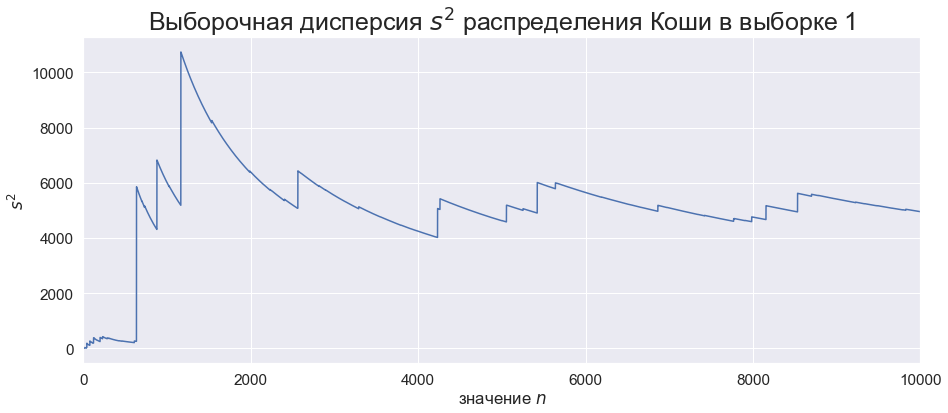

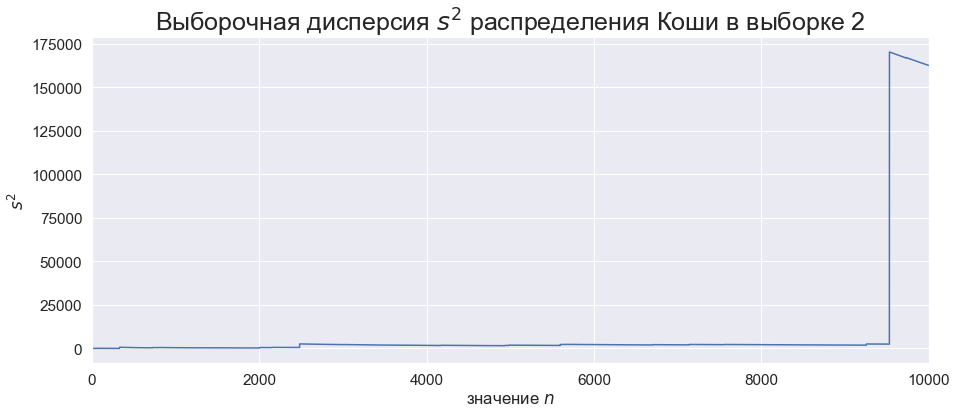

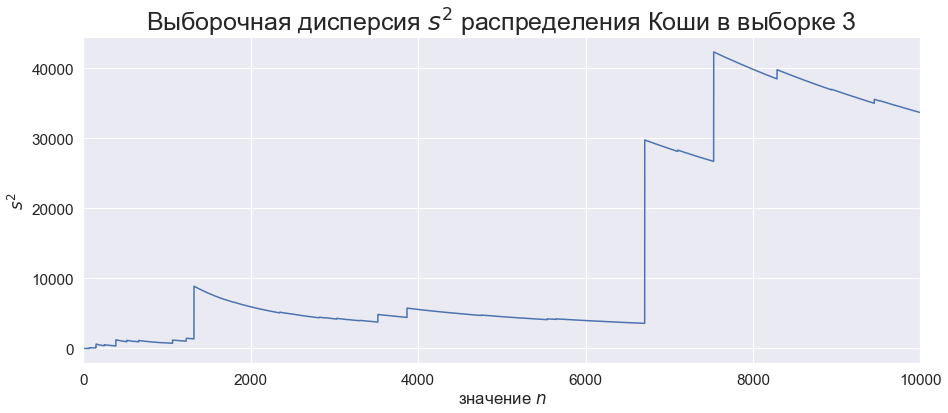

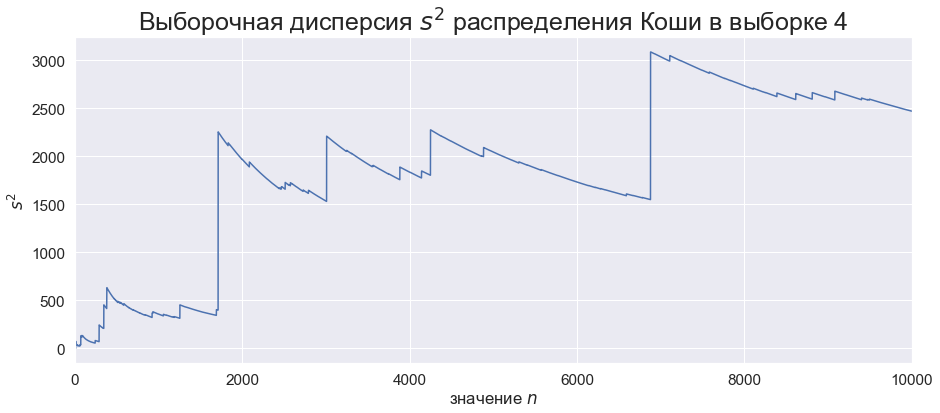

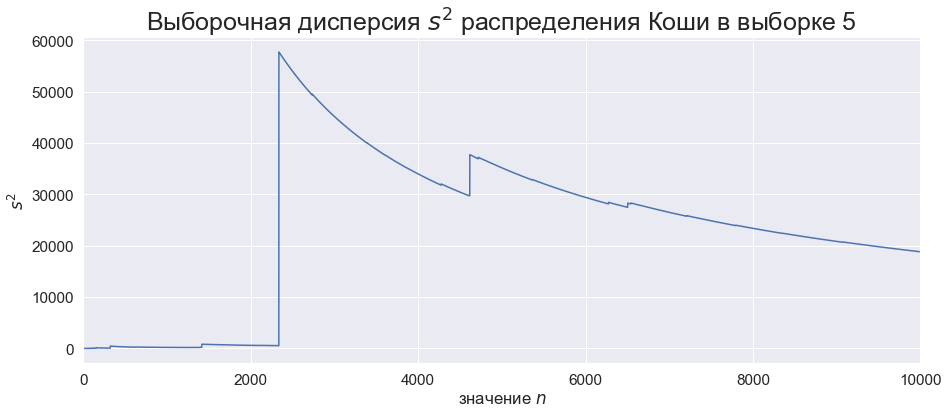

In [11]:
for i in range(1, 6):
    cauchy_sample = sps.cauchy.rvs(size=N)
    cauchy_sample_mean = np.cumsum(cauchy_sample) / samples_len
    cauchy_second_moment = np.cumsum(np.square(cauchy_sample)) / samples_len
    cauchy_sample_variance = cauchy_second_moment - np.square(cauchy_sample_mean)

    plt.figure(figsize=(15, 6))
    sns.lineplot(x=samples_len, y=cauchy_sample_variance)
    plt.xlim(0, N)
    plt.title(f"Выборочная дисперсия $s^2$ распределения Коши в выборке {i}", fontsize=25)
    plt.ylabel("$s^2$")
    plt.xlabel("значение $n$")
    plt.show()

__Вывод:__ 
1) т.к. нет конечного 3го и 4го моментов, про асимптотическую нормальность выборочной дисперсии ничего сказать не можем. Но знаем, что она является состоятельной оценкой дисперсии, и по графику видно что выборочная дисперсия сходится к дисперсии, но не плавно.

2) знаем, что у распределения Коши нет дисперсии, т.к. второй момент не конечен. Значит, выборочная дисперсия не сходится к чему то определенному и по графикам это явно видно.

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [12]:
N = int(1e4)
norm_sample = sps.norm.rvs(size=N)
norm_sample

array([ 0.1158325 , -1.07956056,  0.16124357, ..., -0.40154056,
        1.00502212, -0.44287175])

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [13]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdf = []
for i in range(1, N + 1):
    ecdf.append(ECDF(norm_sample[:i]))

In [14]:
ecdf[N - 1](1)

0.8426

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

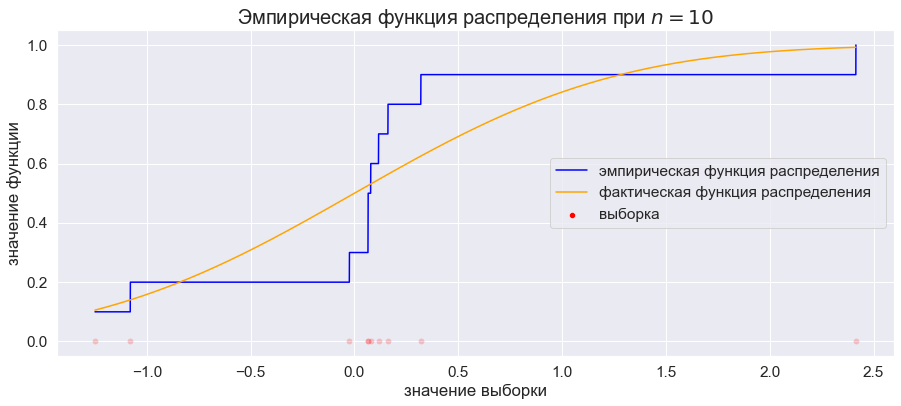

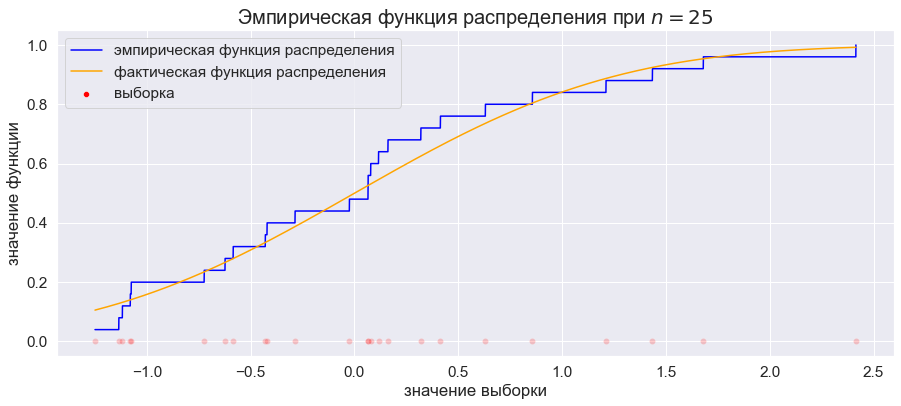

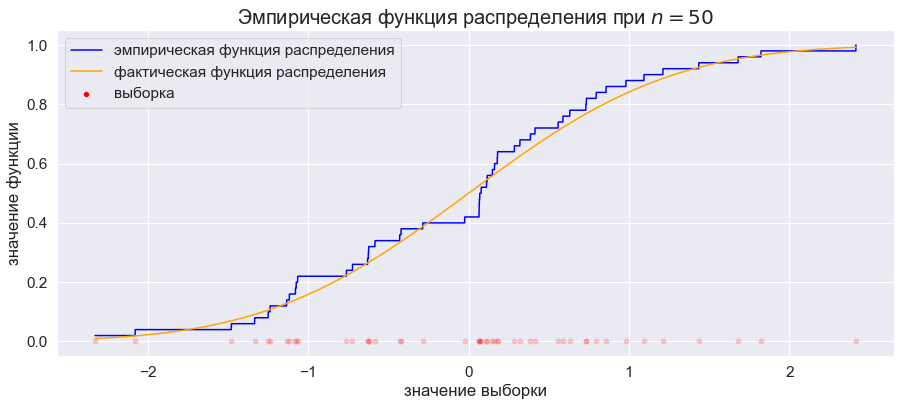

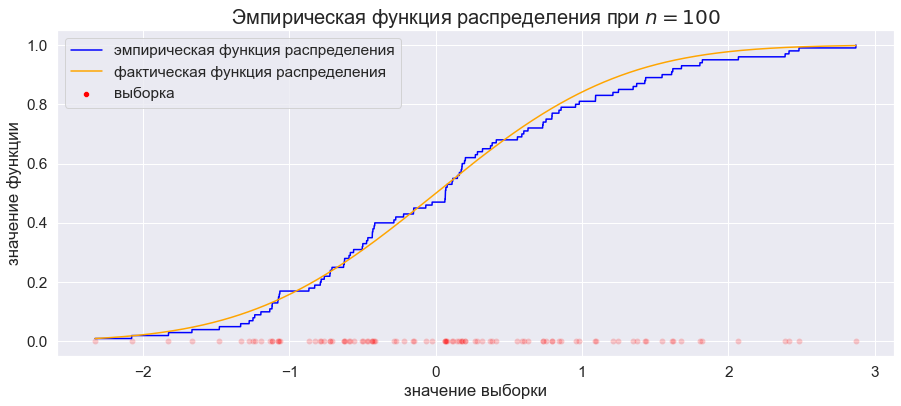

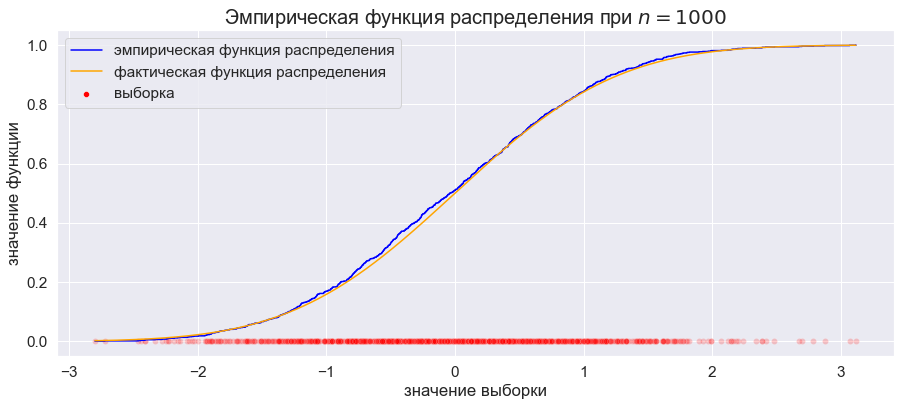

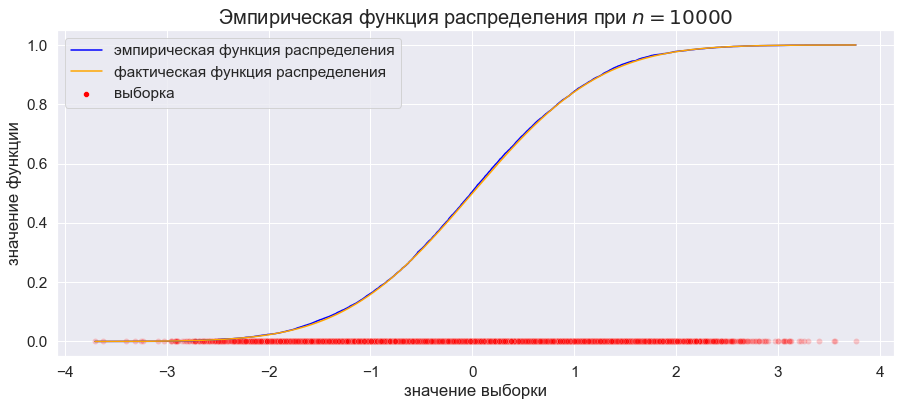

In [15]:
subsample_sizes = [10, 25, 50, 100, 1000, N]
for n in subsample_sizes:
    subsample = norm_sample[:n]
    grid = np.linspace(np.min(subsample), np.max(subsample), N)
    plt.figure(figsize=(15, 6))
    sns.lineplot(x=grid, y=ecdf[n - 1](grid), color='blue', label='эмпирическая функция распределения')
    sns.lineplot(x=grid, y=sps.norm.cdf(grid), color='orange', label='фактическая функция распределения')
    sns.scatterplot(x=subsample, y=[0]*n, alpha=0.2, color='red', label='выборка')
    
    legend = plt.legend()
    for handle in legend.legendHandles:
        handle.set_alpha(1)

    plt.title(f"Эмпирическая функция распределения при $n={n}$", fontsize=20)
    plt.ylabel("значение функции")
    plt.xlabel("значение выборки")
    plt.show()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


__Решение:__ опишем как найти $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ для фиксированного $n$.
Сначала отсортируем подвыборку, понятно что это не повлияет на супремум разности, но поможет найти его максимально точно. Посчитаем значения эмпирической и фактической функции распределения на этой подвыборке, посчитаем супремум из покомпонентной разности полученных значений. Потом сместим значения фактической ф.р. влево и добавим в конец его максимальное значение, т.е. 1, а значения эмпирической ф.р. сместим вправо и добавим в начало минимальное значение его, т.е. 0. Посчитаем супремум покомпонентных разностей уже смещенных значений. Итоговым значением $D_n$ будет максимум из этих двух супремумов. Дело в том, что, разницы между эмпирическим и фактческим ф.р. разумно рассматривать только в точках "скачков". А иногда может случиться что $\hat{F}_n(x_i)-F(x_i)=0 \forall{x_i} \in подвыборки$, но ступенчатая функция не совпадает с настоящей ф.р.. В таких случаях обычно $|\hat{F}_n(x_{i-1})-F(x_i)|>0 \forall{x_i} \in подвыборки$. Из-за этого стоит рассматривать и смещенные значения данных функций распределения.

In [16]:
supremums = np.linspace(0.1, 100.5, N)

for i in range(N):
    subsample = np.sort(norm_sample[:(i + 1)])
    cdf_vals = sps.norm.cdf(subsample)
    cdf_vals_shifted = np.append(cdf_vals, 1)
    ecdf_vals = ecdf[i](subsample)
    ecdf_vals_shifted = np.insert(ecdf_vals, 0, 0)
    supremums[i] = max(np.max(np.abs(cdf_vals - ecdf_vals)), np.max(np.abs(cdf_vals_shifted - ecdf_vals_shifted)))

In [17]:
n_vals = np.arange(1, N + 1)
sqrt_n_supremums = np.sqrt(n_vals) * supremums
supremums.min(), sqrt_n_supremums.min()

(0.008151912937433337, 0.4764393423320315)

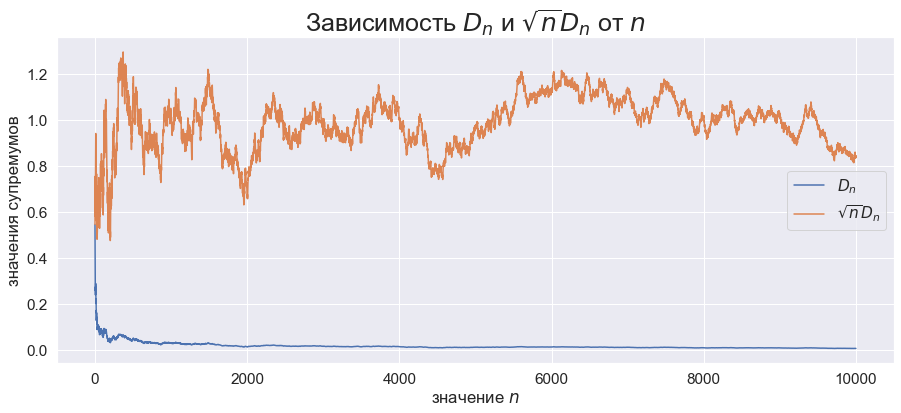

In [18]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=n_vals, y=supremums, label="$D_n$")
sns.lineplot(x=n_vals, y=sqrt_n_supremums, label="$\\sqrt{n} D_n$")
plt.title("Зависимость $D_n$ и $\\sqrt{n} D_n$ от $n$", fontsize=25)
plt.ylabel("значения супремумов")
plt.xlabel("значение $n$")
plt.show()

__Вывод:__
1) из графиков эмпирической функции распределения можно увидеть, что с ростом размера выборки она все лучше приближает истинную функцию распределения.

2) Из теоремы Гливенко-Кантелли знаем что $D_n$ почти наверное сходится к нулю, что также видно по графику, а так же это подтверждает верность пункта 1) вывода. Но из графика ничего невозможно сказать о сходимости $\sqrt{n}D_n$.


### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

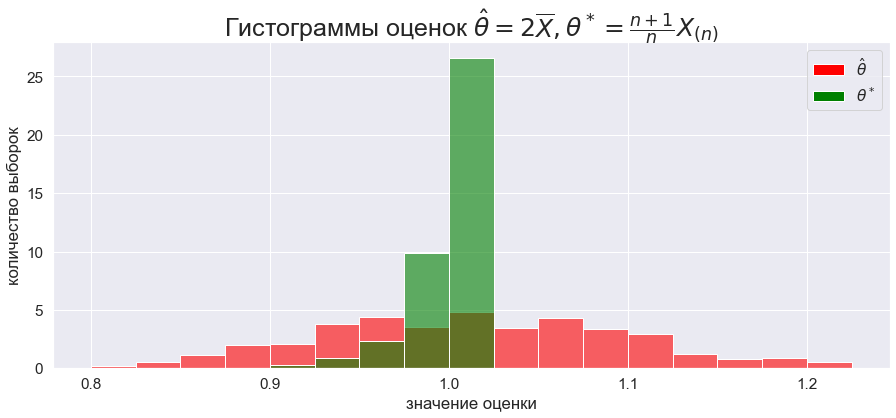

In [19]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

theta = 1
samples = sps.uniform(loc=0, scale=theta).rvs(size=(N_samples, N))
theta_hat = 2 * np.mean(samples, axis=1)
theta_star = (1 + 1/N) * np.max(samples, axis=1)

plt.figure(figsize=(15, 6))
sns.histplot(x=theta_hat, bins=bins, alpha=0.6, color='red', label='$\\hat\\theta$', stat='density')
sns.histplot(x=theta_star, bins=bins, alpha=0.6, color='green', label='$\\theta^*$', stat='density')

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.title("Гистограммы оценок $\\hat\\theta = 2\\overline{X}, \\theta^*= \\frac{n+1}{n} X_{(n)}$", fontsize=25)
plt.ylabel("количество выборок")
plt.xlabel("значение оценки")
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

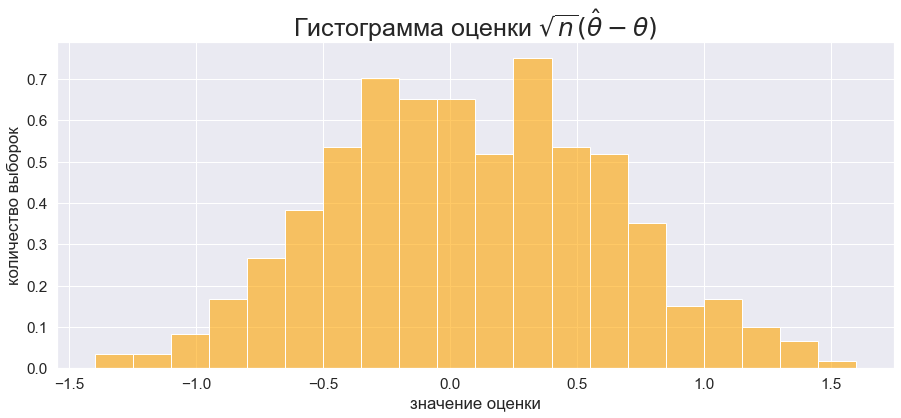

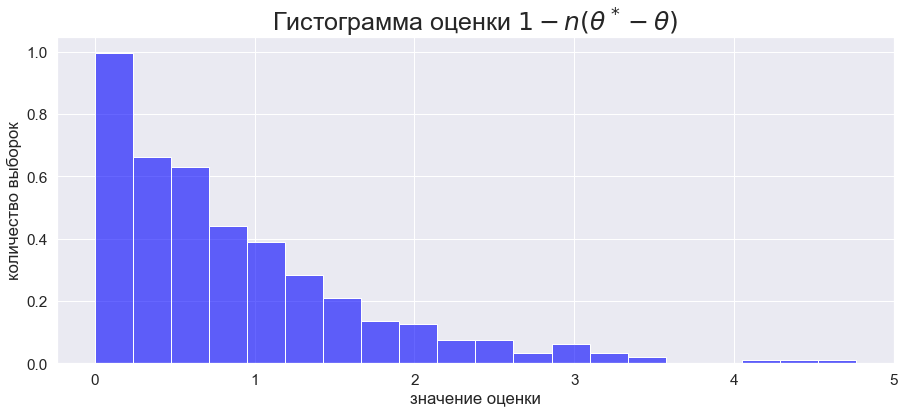

In [20]:
estimators = [(theta_hat - theta) * np.sqrt(N), 1 - N * (theta_star - theta)]
colors = ['orange', 'blue']
estimator_texts = ["$\\sqrt{n} (\\hat\\theta - \\theta)$", "$1 - n  (\\theta^* - \\theta)$"]
for estimator, color, text in zip(estimators, colors, estimator_texts):
    plt.figure(figsize=(15, 6))
    sns.histplot(x=estimator, alpha=0.6, bins=20, color=color, stat='density')
    plt.title(f"Гистограмма оценки {text}", fontsize=25)
    plt.ylabel("количество выборок")
    plt.xlabel("значение оценки")
    plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** на нормальное и экспоненциальное

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sigma(\theta)} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{1}{\sqrt{3}}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sigma(\theta)}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


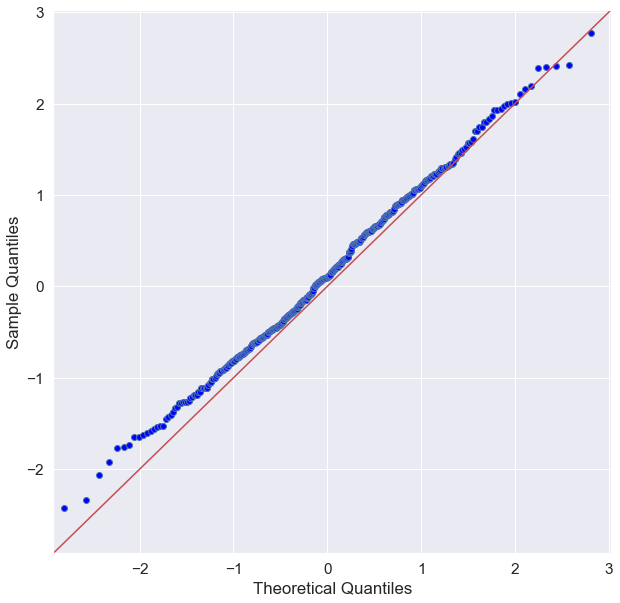

In [21]:
import statsmodels.api as sm


theta_norm = estimators[0] * np.sqrt(3)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Разумеется можно сделать вывод, что $\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sigma(\theta)}$ стремится к нормальному распределению, что давно известно из ЦПТ, а так же $\hat\theta=2\overline{X}$ асимптотически-нормальаня оценка $\theta$. А по графику видно, что теоретические квантили совпадают с выборочными квантилями что так же подтверждает, что выборка взята из нормального распределения.

Вернемся к статистике $1- n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** sps.expon

C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


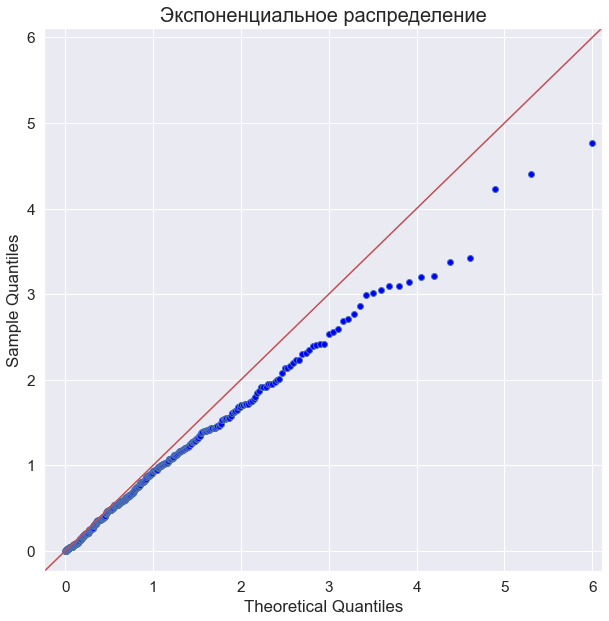

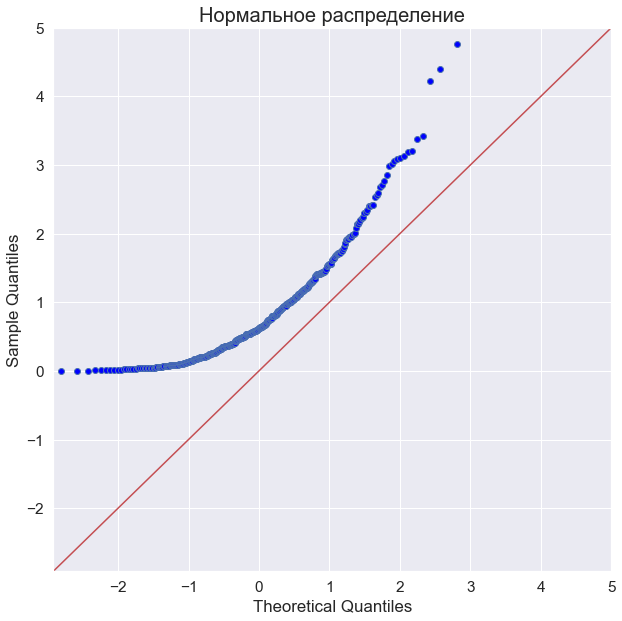

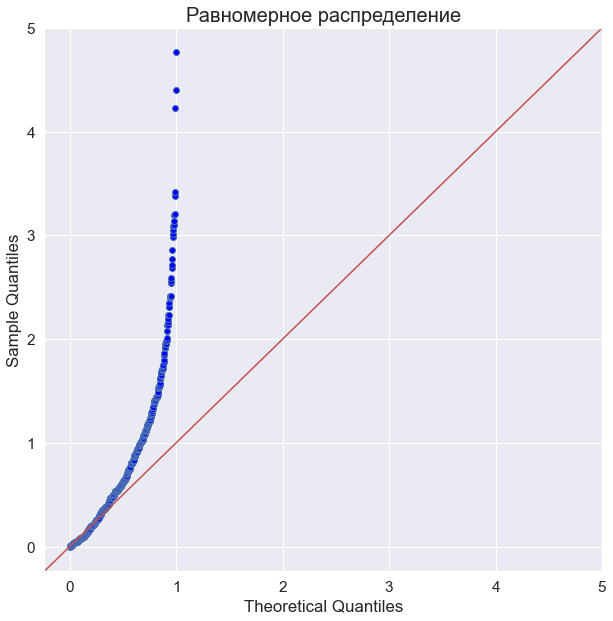

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(estimators[1], dist=sps.expon, line='45', ax=ax)
plt.title("Экспоненциальное распределение", fontsize=20)
fig.show()
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(estimators[1], dist=sps.norm, line='45', ax=ax)
plt.title("Нормальное распределение", fontsize=20)
fig.show()
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(estimators[1], dist=sps.uniform, line='45', ax=ax)
plt.title("Равномерное распределение", fontsize=20)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Нет, не плохо. Т.к. $\forall \alpha < 1 : 1-n^{\alpha}(\theta^*-\theta) \to 0$, а $1-n(\theta^*-\theta) \overset{d}{\to} Exp(\frac{1}{\theta})$. Значит, мы получаем оценку которая сходится быстрее, либо асимптотически принадлежит к другому распределению.

__Вывод:__ Можно легко убедиться, что сходимость $2\overline{X} \overset{P}{\to} \theta$ имеет порядок сходимости $\frac{1}{\sqrt{n}}$, а сходимость $\frac{n+1}{n}X_n \overset{P}{\to} \theta$ имеет порядок сходимости $\frac{1}{n}$, потому что:
$$1-n(\theta^*-\theta)=n(-X_n+\theta) \overset{d}{\to} Exp{(\frac{1}{\theta})} \\ \frac{n+1}{n}X_n \sim X_n.$$
Значит, $\theta^*$ сходится быстрее что, означает она "выгоднее".

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.